In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv("/kaggle/input/laptop/laptop_prices.csv")

In [31]:
features = ['RAM_GB', 'Storage_GB']
X = df[features]
y = df['Price_USD']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
print(f"Model Accuracy (R2 Score): {model.score(X_test, y_test):.2f}")

Model Accuracy (R2 Score): 0.80


In [35]:
print("\nWhat affects the price? ")
for feature, coef in zip(features, model.coef_):
    print(f"Adding 1 unit of {feature} adds ${coef:.2f} to the total amount.")


--- What affects the price? ---
Adding 1 unit of RAM_GB adds $63.91 to the price.
Adding 1 unit of Storage_GB adds $0.02 to the price.


In [43]:
new_laptop = pd.DataFrame([[16, 512]], columns=['RAM_GB', 'Storage_GB'])
predicted_price = model.predict(new_laptop)

In [44]:
print(f"\nPrediction for a laptop with 16GB RAM and 512GB Storage:")
print(f"${predicted_price[0]:.2f}")


Prediction for a laptop with 16GB RAM and 512GB Storage:
$844.98


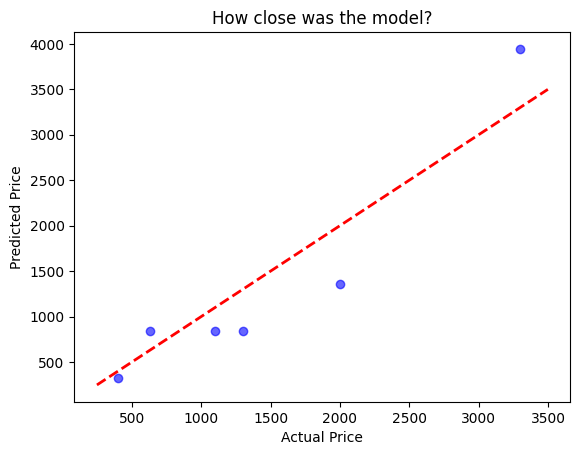

In [45]:
plt.scatter(y_test, model.predict(X_test), color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("How close was the model?")
plt.show()